In [2]:
import pandas as pd

## Data exploration

In [3]:
data = pd.read_csv("Airbnb_Open_Data.csv")
data.head()

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_2248/1113942449.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv")


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [4]:
data.shape

(102599, 26)

In [5]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
data.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
data[data['license'].notna()]

id                                NAME      host id  \
11114   7139598  Cozy 1 BR on Bedford Avenue, Wburg  73023181304   
72947  41289964  Cozy 1 BR on Bedford Avenue, Wburg  25804773951   

      host_identity_verified  host name neighbourhood group neighbourhood  \
11114               verified  Christina            Brooklyn  Williamsburg   
72947            unconfirmed  Christina            Brooklyn  Williamsburg   

            lat      long        country  ... service fee minimum nights  \
11114  40.71764 -73.95689  United States  ...       $140             1.0   
72947  40.71764 -73.95689  United States  ...       $140             1.0   

      number of reviews last review  reviews per month review rate number  \
11114               1.0    1/3/2016               0.02                1.0   
72947               1.0    1/3/2016               0.02                1.0   

      calculated host listings count  availability 365  \
11114                            1.0             191.0   
72947                            1.0               0.0   

                                             house_rules   license  
11114  Dear Guest, Thank you for appreciating that I ...  41662/AL  
72947                                                NaN  41662/AL  

[2 rows x 26 columns]

### Preliminary findings
* There are quite a number of columns with null values, the most notable one being license
* Last review is a date but stored as string

In [9]:
data.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

In [10]:
data.nunique(axis=0)

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

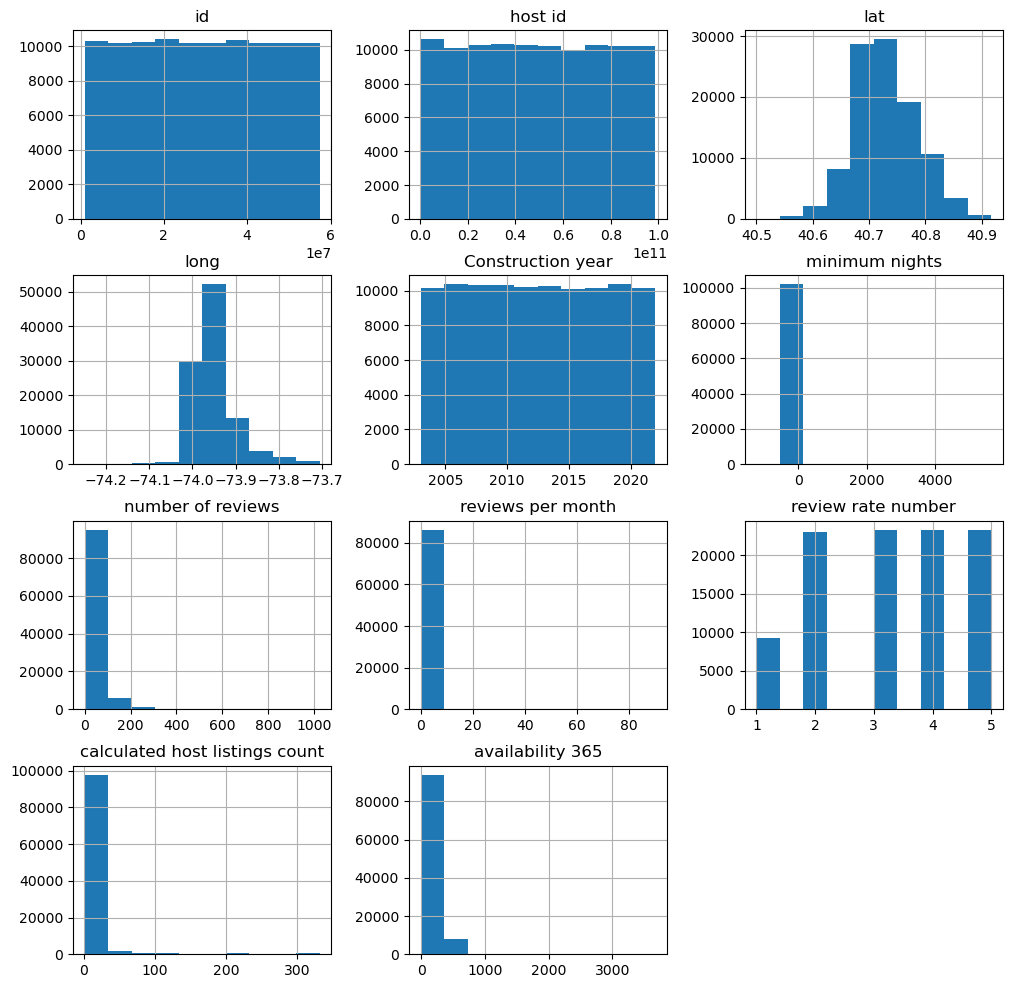

In [11]:
hist = data.hist(figsize=(12,12))

Let's investigate some of these columns

In [12]:
import plotly.express as px
hist = px.histogram(data['number of reviews'])
hist.show()

In [13]:
hist = px.histogram(data['reviews per month'])
hist.show()

Most listings get between 0 and 4 reviews. That explains why monthly review rate is low. Its distribution is skewed right.

In [14]:
hist = px.histogram(data['availability 365'])
hist.show()

Investigating the other columns

In [15]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [16]:
data['calculated host listings count']

0         6.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
102594    1.0
102595    2.0
102596    1.0
102597    1.0
102598    1.0
Name: calculated host listings count, Length: 102599, dtype: float64

In [17]:
data['service fee']

0         $193 
1          $28 
2         $124 
3          $74 
4          $41 
          ...  
102594    $169 
102595    $167 
102596    $198 
102597    $109 
102598    $206 
Name: service fee, Length: 102599, dtype: object

In [18]:
data['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [19]:
data['room type'].value_counts()

Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room type, dtype: int64

## Data cleaning
### Columns to remove
* Name, host id and host name to anonymize the data
* Country and country code because we already know this is data for New York, USA
* House rules because its text we don't need
* License because its mostly null values except for two entries


### Misc
* Service fee and price have a leading $ that needs to be removed. Both these columns should also be converted to float
* Construction year should be converted from float to int
* Minimum nights and availability 365 should be converted from float to int
* Missing values should be dealt with
* Last review to be changed to date data type



Removing needless columns

In [20]:
columns_to_remove = ['NAME','host id', 'host name', 'country', 'country code', 'house_rules', 'license']
clean_data = data.drop(columns=columns_to_remove)
clean_data.head()

id host_identity_verified neighbourhood group neighbourhood       lat  \
0  1001254            unconfirmed            Brooklyn    Kensington  40.64749   
1  1002102               verified           Manhattan       Midtown  40.75362   
2  1002403                    NaN           Manhattan        Harlem  40.80902   
3  1002755            unconfirmed            Brooklyn  Clinton Hill  40.68514   
4  1003689               verified           Manhattan   East Harlem  40.79851   

       long instant_bookable cancellation_policy        room type  \
0 -73.97237            False              strict     Private room   
1 -73.98377            False            moderate  Entire home/apt   
2 -73.94190             True            flexible     Private room   
3 -73.95976             True            moderate  Entire home/apt   
4 -73.94399            False            moderate  Entire home/apt   

   Construction year  price service fee  minimum nights  number of reviews  \
0             2020.0  $966        $193             10.0                9.0   
1             2007.0  $142         $28             30.0               45.0   
2             2005.0  $620        $124              3.0                0.0   
3             2005.0  $368         $74             30.0              270.0   
4             2009.0  $204         $41             10.0                9.0   

  last review  reviews per month  review rate number  \
0  10/19/2021               0.21                 4.0   
1   5/21/2022               0.38                 4.0   
2         NaN                NaN                 5.0   
3    7/5/2019               4.64                 4.0   
4  11/19/2018               0.10                 3.0   

   calculated host listings count  availability 365  
0                             6.0             286.0  
1                             2.0             228.0  
2                             1.0             352.0  
3                             1.0             322.0  
4                             1.0             289.0

Cleaning the price and service fee columns

In [21]:
clean_data['price'] = clean_data['price'].str.lstrip(to_strip='$')
# To remove trailing whitespace
clean_data['price'] = clean_data['price'].str.strip()
# To remove commas
clean_data['price'] = clean_data['price'].str.replace(',', '')
clean_data['price']

0          966
1          142
2          620
3          368
4          204
          ... 
102594     844
102595     837
102596     988
102597     546
102598    1032
Name: price, Length: 102599, dtype: object

In [22]:
clean_data['service fee'] = clean_data['service fee'].str.lstrip(to_strip='$')
# To remove trailing whitespace
clean_data['service fee'] = clean_data['service fee'].str.strip()
# To remove commas
clean_data['service fee'] = clean_data['service fee'].str.replace(',', '')
clean_data['service fee']

0         193
1          28
2         124
3          74
4          41
         ... 
102594    169
102595    167
102596    198
102597    109
102598    206
Name: service fee, Length: 102599, dtype: object

The unwanted characters have been removed. Now we need to convert these columns to float

In [23]:
clean_data['price'] = clean_data['price'].astype(float)
print(clean_data['price'].dtype)
clean_data['service fee'] = clean_data['service fee'].astype(float)
print(clean_data['service fee'].dtype)

float64
float64


Now we can explore these two columns

In [24]:
clean_data['price'].describe()

count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [25]:
clean_data['service fee'].describe()

count    102326.000000
mean        125.026924
std          66.325739
min          10.000000
25%          68.000000
50%         125.000000
75%         183.000000
max         240.000000
Name: service fee, dtype: float64

In [26]:
hist = px.histogram(clean_data['price'])
hist.show()

In [27]:
hist = px.histogram(clean_data['service fee'])
hist.show()

Nothing seems out of the ordinary with these distributions.

Next we convert the construction year column to int. As we can see, there are 214 null values that we need to deal with before conversion. 

This is a good juncture to deal with all missing values

In [28]:
clean_data[clean_data['Construction year'].isna()]

id host_identity_verified neighbourhood group  \
118      1066507                    NaN           Manhattan   
119      1067060                    NaN           Manhattan   
120      1067612                    NaN            Brooklyn   
191      1106825            unconfirmed           Manhattan   
192      1107378               verified           Manhattan   
...          ...                    ...                 ...   
102052  57364656            unconfirmed           Manhattan   
102053  57365208            unconfirmed            Brooklyn   
102054  57365760               verified            Brooklyn   
102055  57366313               verified            Brooklyn   
102056  57366865            unconfirmed           Manhattan   

             neighbourhood       lat      long instant_bookable  \
118        Upper West Side  40.77823 -73.97637            False   
119           East Village  40.72555 -73.97965            False   
120            South Slope  40.66831 -73.98604             True   
191         Hell's Kitchen  40.76307 -73.99665            False   
192        Lower East Side  40.71882 -73.98852            False   
...                    ...       ...       ...              ...   
102052              Inwood  40.86857 -73.91577             True   
102053            Flatbush  40.64945 -73.96108             True   
102054            Bushwick  40.69872 -73.92718            False   
102055  Bedford-Stuyvesant  40.67810 -73.90822             True   
102056              Harlem  40.81248 -73.94317             True   

       cancellation_policy        room type  Construction year   price  \
118                 strict  Entire home/apt                NaN  1154.0   
119                 strict  Entire home/apt                NaN   737.0   
120               moderate     Private room                NaN   456.0   
191               moderate  Entire home/apt                NaN   539.0   
192                 strict  Entire home/apt                NaN   232.0   
...                    ...              ...                ...     ...   
102052            flexible     Private room                NaN  1183.0   
102053            moderate     Private room                NaN   696.0   
102054            flexible     Private room                NaN   909.0   
102055            moderate  Entire home/apt                NaN   387.0   
102056              strict     Private room                NaN   848.0   

        service fee  minimum nights  number of reviews last review  \
118           231.0             6.0               27.0   4/27/2019   
119           147.0             1.0              115.0    6/7/2019   
120            91.0             2.0              354.0   5/20/2019   
191           108.0             NaN               41.0   6/26/2025   
192            46.0             NaN              109.0   6/15/2019   
...             ...             ...                ...         ...   
102052          NaN             4.0               95.0    7/1/2019   
102053          NaN             7.0               12.0   3/27/2019   
102054          NaN             1.0               19.0   8/31/2017   
102055          NaN             2.0               50.0   6/26/2019   
102056          NaN             2.0                0.0         NaN   

        reviews per month  review rate number  calculated host listings count  \
118                  0.27                 NaN                             NaN   
119                  1.05                 NaN                             NaN   
120                  3.20                 NaN                             NaN   
191                  0.38                 2.0                             1.0   
192                  1.04                 2.0                             1.0   
...                   ...                 ...                             ...   
102052               3.65                 2.0                             1.0   
102053               0.44                 5.0                             

What percentage of our data is missing?

In [29]:
import numpy as np
total_cells = np.product(clean_data.shape)
missing_values_count = clean_data.isnull().sum()
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
percent_missing

1.781180795339649

1.781% of our data is missing. That's amazing! If we choose to completely drop missing values, we won't lose a lot of data.

In [30]:
missing_values_count

id                                    0
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

Since there are many columns with missing values, at this point, it would be easier to just drop all rows with missing values. I chose to go with this approach instead of imputing the missing data because that would add a lot of noise to the data.

In [31]:
clean_data.shape

(102599, 19)

In [66]:
new_clean_data = clean_data.dropna()
new_clean_data.shape

(84798, 19)

How much data did we lose?

In [67]:
old_size = np.product(clean_data.shape)
new_size = np.product(new_clean_data.shape)
(old_size - new_size) / old_size * 100

17.35007163812513

17%. Not too bad. We still have 19 columns and 84798 rows to work with.

__Why is there a discrepancy between this number and the percentage of missing values we calculated earlier?__

In [68]:
new_clean_data.isna().sum()

id                                0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

Now that all missing data points have been removed, we can proceed with data type conversions

In [69]:
new_clean_data['Construction year'] = new_clean_data['Construction year'].astype(int)
print(new_clean_data['Construction year'].dtype)

int64


/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_2248/256768917.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We can do this for each individual column but there is a faster way to do this.

In [70]:
new_clean_data = new_clean_data.astype({"minimum nights":'int', "availability 365":'int', 
"number of reviews": 'int', "calculated host listings count": 'int'})
new_clean_data.dtypes

id                                  int64
host_identity_verified             object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                   int64
price                             float64
service fee                       float64
minimum nights                      int64
number of reviews                   int64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count      int64
availability 365                    int64
dtype: object

The last data type conversion we'll do will be on the last review column.

In [71]:
new_clean_data['last review']

0         10/19/2021
1          5/21/2022
3           7/5/2019
4         11/19/2018
5          6/22/2019
             ...    
102588     6/29/2019
102591      1/4/2019
102593      9/6/2015
102595      7/6/2015
102597    10/11/2015
Name: last review, Length: 84798, dtype: object

In [72]:
new_clean_data['last review'] = pd.to_datetime(new_clean_data['last review'], format="%m/%d/%Y")
new_clean_data['last review']

0        2021-10-19
1        2022-05-21
3        2019-07-05
4        2018-11-19
5        2019-06-22
            ...    
102588   2019-06-29
102591   2019-01-04
102593   2015-09-06
102595   2015-07-06
102597   2015-10-11
Name: last review, Length: 84798, dtype: datetime64[ns]

One final thing. We check for duplicates. It wouldn't make sense for there to be duplicated id values, so we remove them.

In [73]:
new_clean_data.duplicated().sum()

467

In [74]:
new_clean_data[new_clean_data.duplicated(subset='id', keep=False)].sort_values(by='id')

id host_identity_verified neighbourhood group  \
9098     6026161               verified           Manhattan   
102474   6026161               verified           Manhattan   
102475   6026714               verified           Manhattan   
9099     6026714               verified           Manhattan   
9100     6027266               verified           Manhattan   
...          ...                    ...                 ...   
62657   35606797            unconfirmed            Brooklyn   
102240  35607349            unconfirmed           Manhattan   
62658   35607349            unconfirmed           Manhattan   
102241  35607902               verified            Brooklyn   
62659   35607902               verified            Brooklyn   

             neighbourhood       lat      long instant_bookable  \
9098       Upper East Side  40.76222 -73.96030            False   
102474     Upper East Side  40.76222 -73.96030            False   
102475     Upper East Side  40.76249 -73.96217            False   
9099       Upper East Side  40.76249 -73.96217            False   
9100       Upper East Side  40.76021 -73.96157            False   
...                    ...       ...       ...              ...   
62657      Carroll Gardens  40.68383 -73.99281             True   
102240     Upper East Side  40.76132 -73.96064             True   
62658      Upper East Side  40.76132 -73.96064             True   
102241  Bedford-Stuyvesant  40.68990 -73.94074             True   
62659   Bedford-Stuyvesant  40.68990 -73.94074             True   

       cancellation_policy        room type  Construction year   price  \
9098              moderate  Entire home/apt               2008   105.0   
102474            moderate  Entire home/apt               2008   105.0   
102475            moderate  Entire home/apt               2008   285.0   
9099              moderate  Entire home/apt               2008   285.0   
9100              moderate  Entire home/apt               2014   586.0   
...                    ...              ...                ...     ...   
62657             moderate  Entire home/apt               2009  1027.0   
102240              strict     Private room               2015   141.0   
62658               strict     Private room               2015   141.0   
102241            moderate     Private room               2008   284.0   
62659             moderate     Private room               2008   284.0   

        service fee  minimum nights  number of reviews last review  \
9098           21.0              30                  2  2019-06-08   
102474         21.0              30                  2  2019-06-08   
102475         57.0              30                  6  2019-01-31   
9099           57.0              30                  6  2019-01-31   
9100          117.0              30                 10  2018-11-18   
...             ...             ...                ...         ...   
62657         205.0              30                 18  2021-11-04   
102240         28.0              30                  1  2021-11-04   
62658          28.0              30                  1  2021-11-04   
102241         57.0              30                  1  2021-11-04   
62659          57.0              30                  1  2021-11-04   

        reviews per month  review rate number  calculated host listings count  \
9098                 0.21                 3.0                              34   
102474               0.21                 3.0                              34   
102475               0.14                 3.0                              34   
9099                 0.14                 3.0                              34   
9100                 0.22                 5.0                              34   
...                   ...                 ...                             ...   
62657                0.63                 2.0                               1   
102240               0.25                 3.0                             

In [75]:
new_clean_data = new_clean_data.drop_duplicates(subset='id', keep='first')

At this stage, all cleaning is now done. It is a good idea to export the clean data to a file.

In [77]:
new_clean_data.to_csv("airbnb_cleaned.csv", index=False)